### Exploratory Data Analysis on Bank Domain - Credit Risk Scoring

#### Data Description 

- Figure out the target variable and the kind of algorithms we can apply to learn a ML model on the given problem.

#### Columns in table are

- person_age - Age
- person_income - Annual Income
- person_home_ownership - Home ownership
- person_emp_length - Employment length (in years)
- loan_intent - Loan intent
- loan_grade - Loan grade
- loan_amnt - Loan amount
- loan_int_rate - Interest rate
- loan_status - Loan status (0 is non default 1 is default)
- loan_percent_income - Percent income
- cb_person_default_on_file - Historical default
- cb_preson_cred_hist_length - Credit history length

####  Import the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the Data

In [2]:
df = pd.read_csv('C:/Users/Kamal/Downloads/projects/Bank domain/credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


- person_age                     - Age
- person_income                  - Annual Income
- person_home_ownership          - Home ownership
- person_emp_length              - Employment length (in years)
- loan_intent                    - Loan intent
- loan_grade                     - Loan grade
- loan_amnt                      - Loan amount
- loan_int_rate                  - Interest rate
- loan_status                    - Loan status (0 is non default 1 is default)
- loan_percent_income            - Percent income
- cb_person_default_on_file      - Historical default
- cb_preson_cred_hist_length     - Credit history length 

In [3]:
# check columns
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [4]:
# check shape
df.shape


(32581, 12)

In [5]:
# check dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
# check null values
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
# fillup null values
df.person_emp_length.fillna(0,inplace = True)

In [8]:
# fillup null values
df.loan_int_rate .fillna(0,inplace = True)

In [9]:
# check null values
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [10]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.658114,9589.371106,9.958552,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.159669,6322.086646,4.470390,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.620000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


#### Univaraint Analysis

In [11]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='person_age', ylabel='Density'>

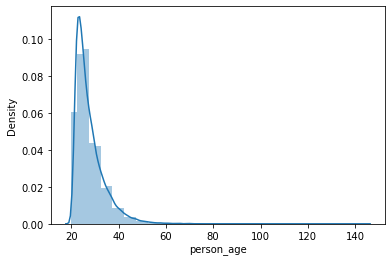

In [12]:
#check the distribution of person_age 
sns.distplot(df['person_age'])

##### The higher density of person_age btw 20 -40

<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

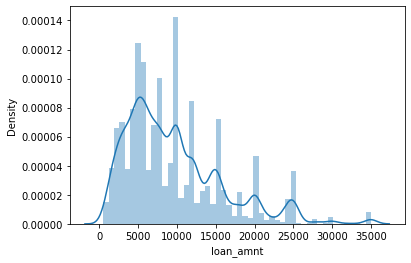

In [13]:
#check the distribution of loan_amnt
sns.distplot(df['loan_amnt'])

<AxesSubplot:xlabel='person_age'>

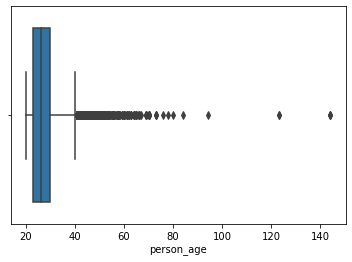

In [14]:
sns.boxplot(df['person_age'])

1. There are oultliers in the age which is above 40 age
2. The most of data in this dataset around 20 - 40 age

<AxesSubplot:xlabel='person_home_ownership', ylabel='count'>

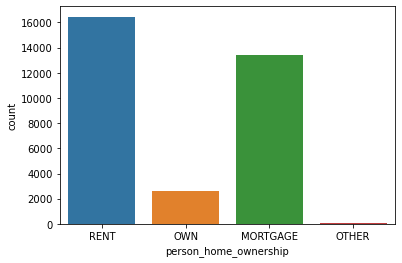

In [15]:
#check frequency distribution of marital
sns.countplot(df['person_home_ownership'])

 Most of people take loan for RENT

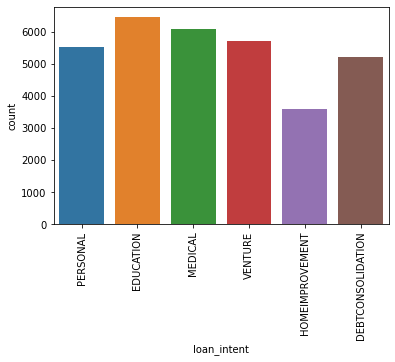

In [16]:
#check frequency distribution of loan_intent
sns.countplot(df['loan_intent'])
plt.xticks(rotation = 90)
plt.show()

Highest loan take for EDUCATION and lowest loan for HOMEEIMPROVEMENT

<AxesSubplot:xlabel='loan_status', ylabel='Density'>

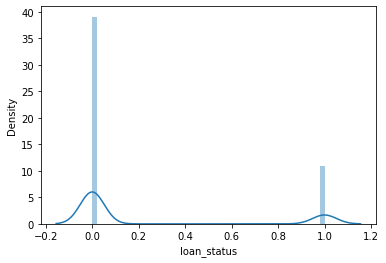

In [17]:
#check the distribution of loan_status
sns.distplot(df['loan_status'])

Here represent 0 for not default and 1 for default. the density of 0 is higher than 1. In this dataset not default people more than default. 

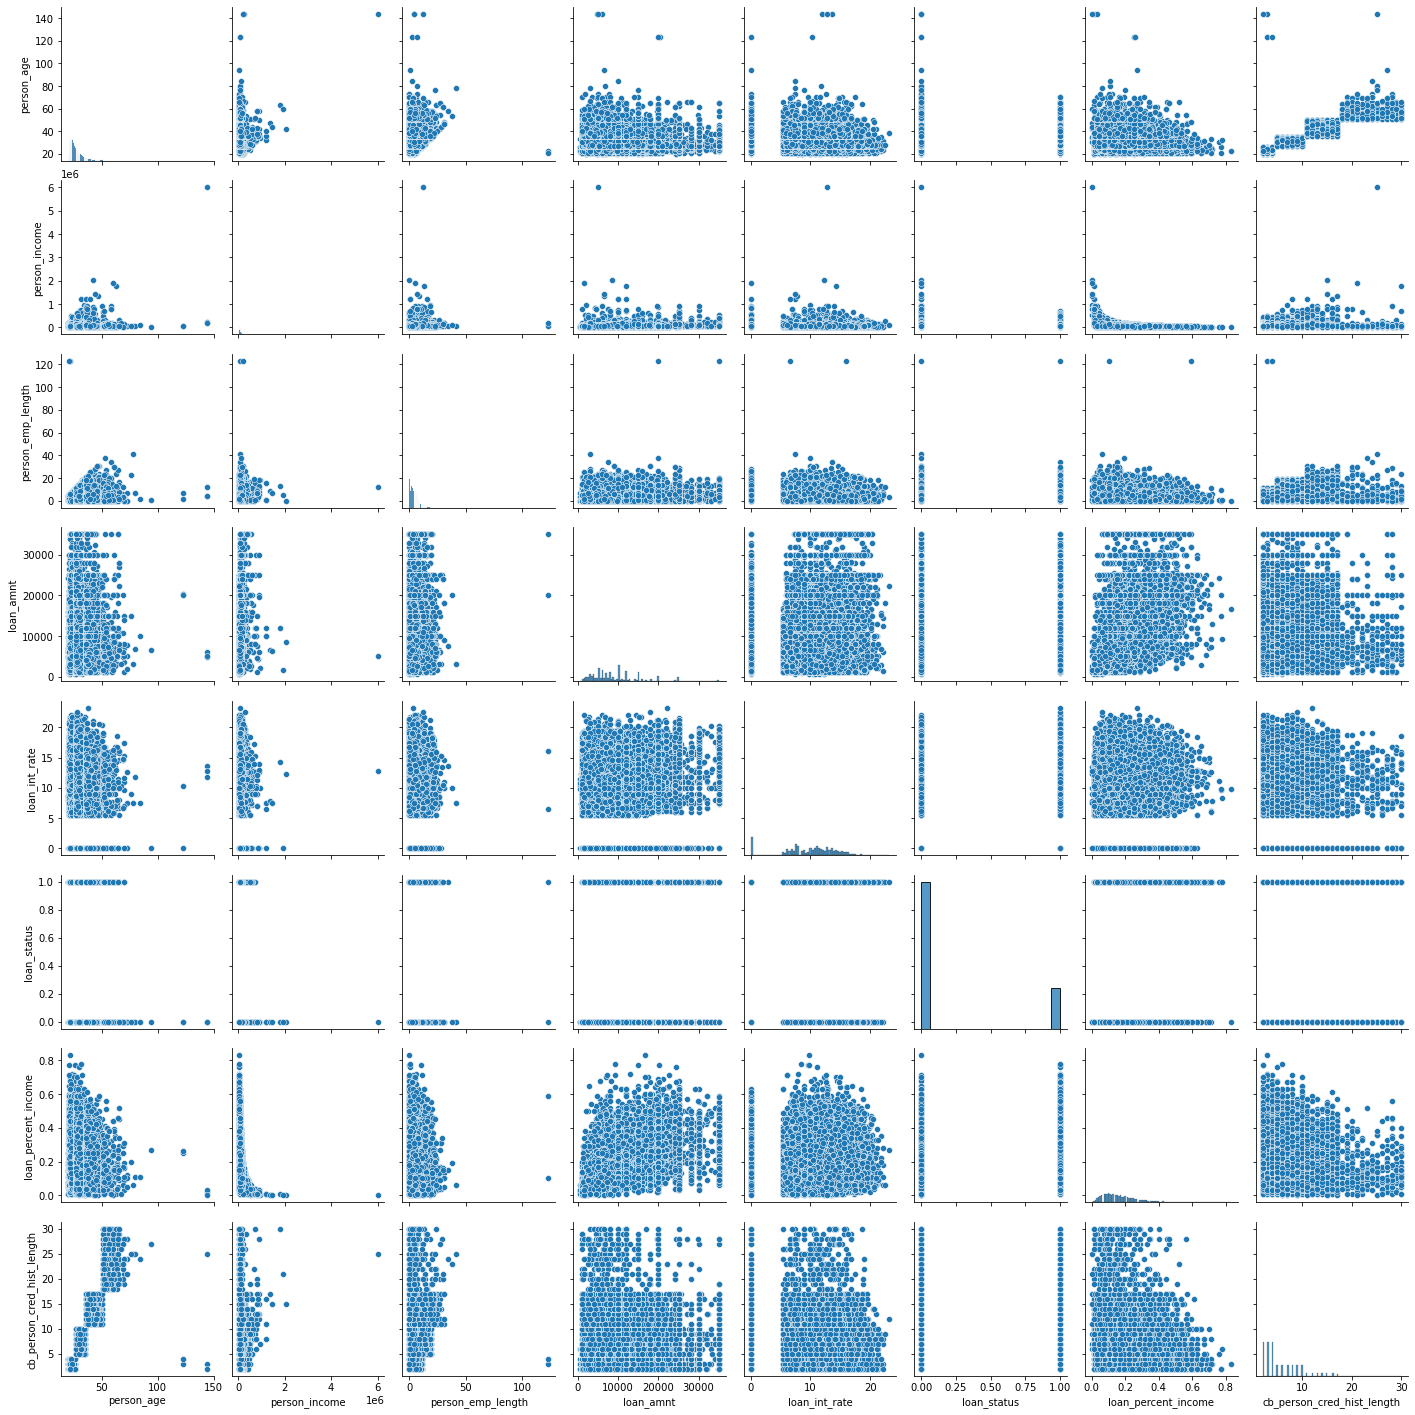

In [18]:
# pairplot for all columns
sns.pairplot(df)

#### Bivariant Analysis

In [19]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


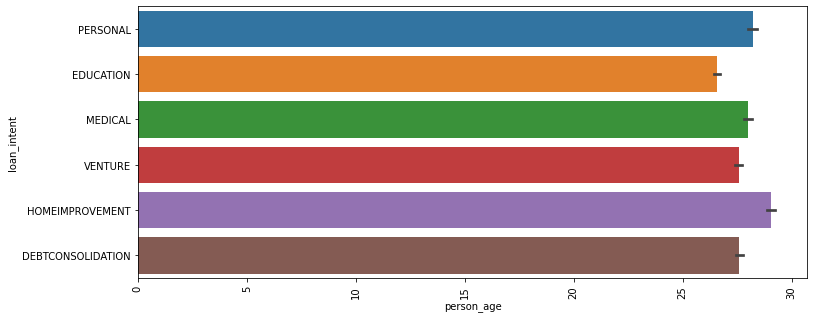

In [20]:
# check job and campaign
plt.figure(figsize=(12,5))
sns.barplot(x = 'person_age',y = 'loan_intent',data = df)
plt.xticks(rotation = 90)
plt.show()

In this dataset people take loan btw the age 25 - 30

<AxesSubplot:xlabel='loan_status', ylabel='person_income'>

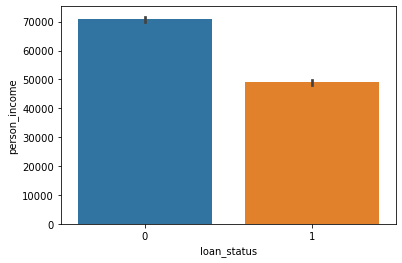

In [21]:
# check person_income and loan_stat relation
sns.barplot(y = 'person_income',x = 'loan_status',data = df)

Those people not default(0) whose income nearly 70,000 and those people are default(1) whose income nearly 50,000

<AxesSubplot:xlabel='loan_intent', ylabel='count'>

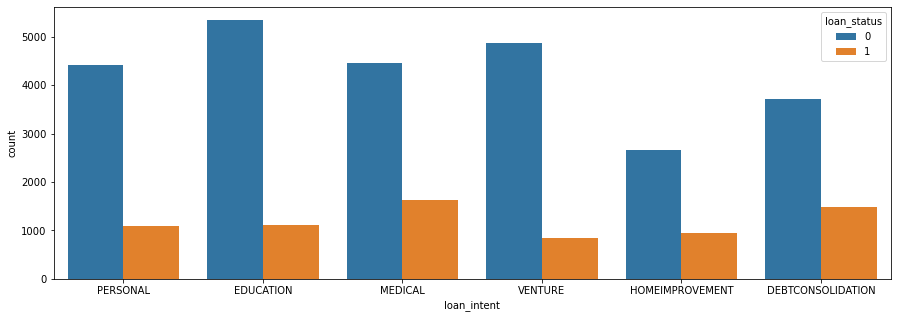

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(df['loan_intent'],hue = df['loan_status'])

 Those people take loan for education these are not more default but those take for Medical these are more defult then others.

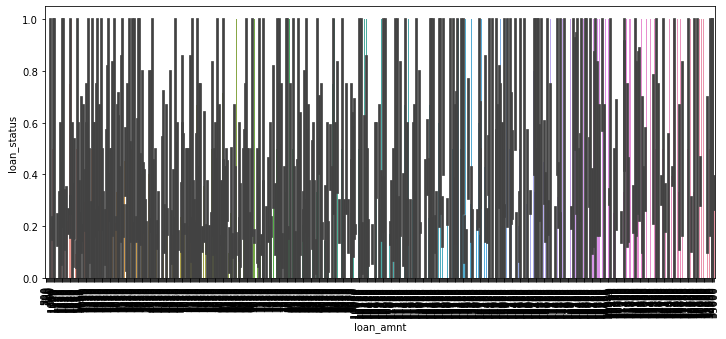

In [23]:
# Barplot btw loan_amnt and loan_status
plt.figure(figsize=(12,5))
sns.barplot(x = 'loan_amnt',y = 'loan_status',data = df)
plt.xticks(rotation = 90)
plt.show()

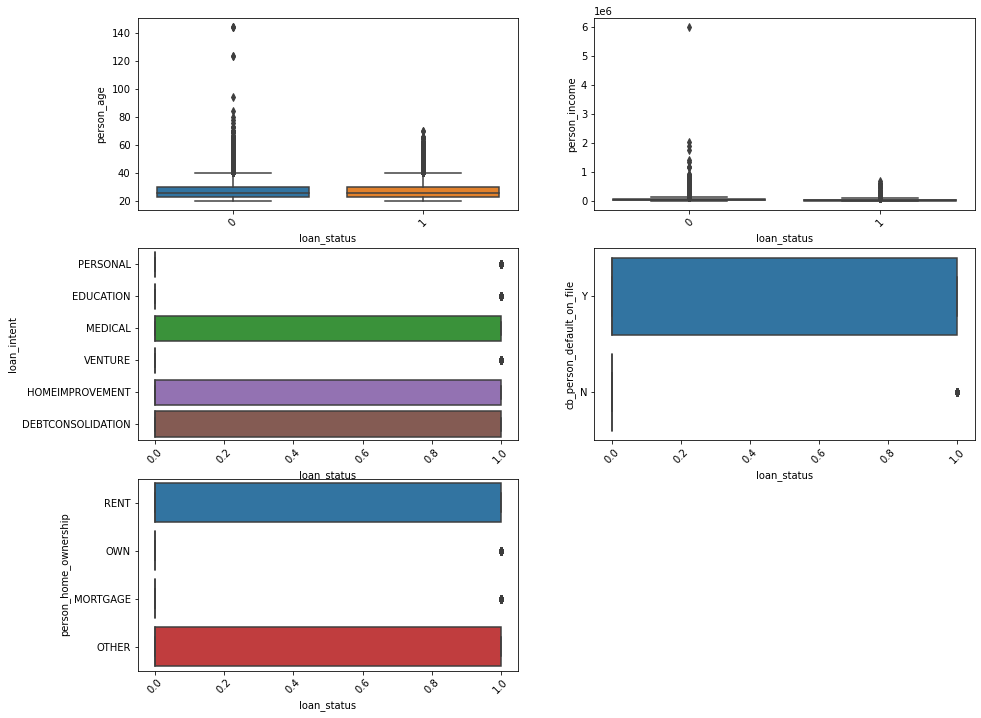

In [24]:
#check loan_status with person_age, person_income, loan_intent, cb_person_default_on_file, person_home_ownership
plt.figure(figsize=(15,12))
plt.subplot(3,2,1)
sns.boxplot(y = df['person_age'],x = df['loan_status'])
plt.xticks(rotation = 45)
plt.subplot(3,2,2)
sns.boxplot(y = df['person_income'],x = df['loan_status'])
plt.xticks(rotation = 45)
plt.subplot(3,2,3)
sns.boxplot(y = df['loan_intent'],x = df['loan_status'])
plt.xticks(rotation = 45)
plt.subplot(3,2,4)
sns.boxplot(y = df['cb_person_default_on_file'],x = df['loan_status'])
plt.xticks(rotation = 45)
plt.subplot(3,2,5)
sns.boxplot(y = df['person_home_ownership'],x = df['loan_status'])
plt.xticks(rotation = 45)
plt.show()

In [25]:
#Find the correlation between the columns and draw the observations from it
df_cor = df.corr()

<AxesSubplot:>

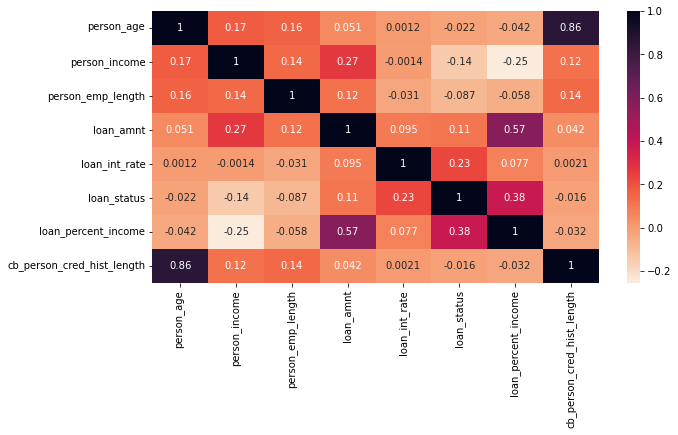

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(df_cor,annot=True,cmap= 'rocket_r')

### Machine Learning Problem

#### Build a system which can take features of Bank domain like person age, person_income, person_home_ownership, loan_grade, loan_amnt, loan_percent_income,cb_person_default_on_file ,cb_person_cred_hist_length  , etc.. and predicts the Loan_status of Bank_domain.

 Target Variable: __

In [27]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [28]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


#### Data Preparation

Train Test Split
Encoding for Categorical Columns
Ordinal : LabelEncoding or OrdinalEncoding
Nominal : OneHotEncoding or get_dummies
Encoding for Numerical Columns
Standardization (z-transformation)

#### We will be following below mentioned steps:

- Identify the Target Variable and Splitting the Data into train and test
- Separating Categorical and Numerical Columns
- Rescaling Numerical Columns (Standardization or z-transformation)
- Applying OneHotEncoding on Categorical Columns
- Applying Label Encoding on Categorical Columns
- Concatinating the Encoded Categorical Features and Scaled Numerical Features

#### a. Identify the Target Variable and Splitting the Data into Train and Test

In [29]:
import sklearn

print(sklearn.__version__)

1.0.2


In [30]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [31]:
# Identifying the inputs (X) and output (y)

y = df['loan_status']

X = df[['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']]

In [32]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [33]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
18046,31,190000,OWN,8.0,EDUCATION,A,15000,6.03,0.08,N,8
9275,24,54500,MORTGAGE,7.0,MEDICAL,D,8000,17.49,0.15,N,4
5210,23,38400,MORTGAGE,2.0,DEBTCONSOLIDATION,D,15000,17.27,0.39,N,3
9775,22,64000,MORTGAGE,5.0,MEDICAL,A,2000,9.32,0.03,N,4
27803,28,225000,MORTGAGE,12.0,DEBTCONSOLIDATION,B,6000,11.12,0.03,N,7


In [34]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)


(22806, 11) (22806,)
(9775, 11) (9775,)


#### b. Separating Categorical and Numerical Columns:

In [35]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
18046,31,190000,OWN,8.0,EDUCATION,A,15000,6.03,0.08,N,8
9275,24,54500,MORTGAGE,7.0,MEDICAL,D,8000,17.49,0.15,N,4
5210,23,38400,MORTGAGE,2.0,DEBTCONSOLIDATION,D,15000,17.27,0.39,N,3
9775,22,64000,MORTGAGE,5.0,MEDICAL,A,2000,9.32,0.03,N,4
27803,28,225000,MORTGAGE,12.0,DEBTCONSOLIDATION,B,6000,11.12,0.03,N,7


In [36]:
X_train.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

#### separate columns into categorial and Numerical

In [37]:
# Categorial columns
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()


,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
18046,OWN,EDUCATION,A,N
9275,MORTGAGE,MEDICAL,D,N
5210,MORTGAGE,DEBTCONSOLIDATION,D,N
9775,MORTGAGE,MEDICAL,A,N
27803,MORTGAGE,DEBTCONSOLIDATION,B,N


In [39]:
# Numerical columns
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
18046,31,190000,8.0,15000,6.03,0.08,8
9275,24,54500,7.0,8000,17.49,0.15,4
5210,23,38400,2.0,15000,17.27,0.39,3
9775,22,64000,5.0,2000,9.32,0.03,4
27803,28,225000,12.0,6000,11.12,0.03,7


#### c. Scaling the Numerical Features

In [40]:
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
18046,31,190000,8.0,15000,6.03,0.08,8
9275,24,54500,7.0,8000,17.49,0.15,4
5210,23,38400,2.0,15000,17.27,0.39,3
9775,22,64000,5.0,2000,9.32,0.03,4
27803,28,225000,12.0,6000,11.12,0.03,7


In [41]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
18046,0.521395,1.921063,0.808721,0.861154,-0.885375,-0.837814,0.539704
9275,-0.594706,-0.182430,0.566709,-0.248297,1.684033,-0.183176,-0.445764
5210,-0.754149,-0.432366,-0.643347,0.861154,1.634707,2.061294,-0.692131
9775,-0.913592,-0.034953,0.082687,-1.199255,-0.147735,-1.305412,-0.445764
27803,0.043066,2.464401,1.776766,-0.565283,0.255837,-1.305412,0.293337


#### d. Applying OneHotEncoding on Categorical Columns

In [42]:
X_train_cat['person_home_ownership'].value_counts(normalize=True)

RENT        0.502412
MORTGAGE    0.414058
OWN         0.080110
OTHER       0.003420
Name: person_home_ownership, dtype: float64

In [43]:
X_train_cat['loan_intent'].value_counts(normalize=True)

EDUCATION            0.199114
MEDICAL              0.185478
VENTURE              0.176050
PERSONAL             0.167807
DEBTCONSOLIDATION    0.161536
HOMEIMPROVEMENT      0.110015
Name: loan_intent, dtype: float64

In [44]:
X_train_cat['loan_grade'].value_counts(normalize=True)

A    0.330483
B    0.320880
C    0.197141
D    0.112339
E    0.029378
F    0.007717
G    0.002061
Name: loan_grade, dtype: float64

In [45]:
X_train_cat['cb_person_default_on_file'].value_counts(normalize=True)

N    0.822722
Y    0.177278
Name: cb_person_default_on_file, dtype: float64

In [46]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
18046,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9275,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9775,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### e. Applying Label Encoding on Categorical Columns

In [47]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
18046
9275
5210
9775
27803


##### Apply label Encoding on categorial column 'person_home_ownership'

In [48]:
X_train_cat.person_home_ownership.unique()

array(['OWN', 'MORTGAGE', 'RENT', 'OTHER'], dtype=object)

In [49]:
cut_encoder = {'OWN' : 1, 'MORTGAGE' : 2, 'RENT' : 3, 'OTHER' : 4, }

X_train_cat_le['person_home_ownership'] = X_train_cat['person_home_ownership'].apply(lambda x : cut_encoder[x])

X_train_cat_le.head()

,person_home_ownership
18046,1
9275,2
5210,2
9775,2
27803,2


##### Apply label Encoding on categorial column 'loan_intent'

In [50]:
X_train_cat.loan_intent.unique()

array(['EDUCATION', 'MEDICAL', 'DEBTCONSOLIDATION', 'PERSONAL',
       'HOMEIMPROVEMENT', 'VENTURE'], dtype=object)

In [51]:
clarity_encoder = {'EDUCATION':1, 'MEDICAL':2, 'DEBTCONSOLIDATION':3, 'PERSONAL':4, 'HOMEIMPROVEMENT':5, 'VENTURE':6}

X_train_cat_le['loan_intent'] = X_train_cat['loan_intent'].apply(lambda x : clarity_encoder[x])

X_train_cat_le.head()

,person_home_ownership,loan_intent
18046,1,1
9275,2,2
5210,2,3
9775,2,2
27803,2,3


##### Apply label Encoding on categorial column 'loan_grade'

In [52]:
X_train_cat.loan_grade.unique()

array(['A', 'D', 'B', 'C', 'E', 'F', 'G'], dtype=object)

In [53]:
X_train_cat.cb_person_default_on_file.unique()

array(['N', 'Y'], dtype=object)

In [54]:
grade_encoder = {'A':1, 'D':2, 'B':3, 'C':4, 'E':5, 'F':6, 'G':7}

X_train_cat_le['loan_grade'] = X_train_cat['loan_grade'].apply(lambda x : grade_encoder[x])

X_train_cat_le.head()

,person_home_ownership,loan_intent,loan_grade
18046,1,1,1
9275,2,2,2
5210,2,3,2
9775,2,2,1
27803,2,3,3


##### Apply label Encoding on categorial column 'cb_person_default_on_file'

In [55]:
default_encoder = {'N':1,'Y':2}

X_train_cat_le['cb_person_default_on_file'] = X_train_cat['cb_person_default_on_file'].apply(lambda x : default_encoder[x])

X_train_cat_le.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
18046,1,1,1,1
9275,2,2,2,1
5210,2,3,2,1
9775,2,2,1,1
27803,2,3,3,1


#### f. Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [56]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)

X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
18046,0.521395,1.921063,0.808721,0.861154,-0.885375,-0.837814,0.539704,1,1,1,1
9275,-0.594706,-0.182430,0.566709,-0.248297,1.684033,-0.183176,-0.445764,2,2,2,1
5210,-0.754149,-0.432366,-0.643347,0.861154,1.634707,2.061294,-0.692131,2,3,2,1
9775,-0.913592,-0.034953,0.082687,-1.199255,-0.147735,-1.305412,-0.445764,2,2,1,1
27803,0.043066,2.464401,1.776766,-0.565283,0.255837,-1.305412,0.293337,2,3,3,1


#### g. Preparing Test Data

In [57]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
10775,25,40000,RENT,0.0,EDUCATION,B,10000,12.18,0.25,N,3
28127,30,125000,MORTGAGE,14.0,VENTURE,A,5750,7.43,0.05,N,10
17835,29,70500,RENT,5.0,PERSONAL,A,35000,8.90,0.50,N,6
15419,26,135000,MORTGAGE,11.0,EDUCATION,A,6700,6.03,0.05,N,4
20158,30,34000,RENT,0.0,VENTURE,B,4000,10.95,0.12,N,10


In [58]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9775 entries, 10775 to 27585
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  9775 non-null   int64  
 1   person_income               9775 non-null   int64  
 2   person_home_ownership       9775 non-null   object 
 3   person_emp_length           9775 non-null   float64
 4   loan_intent                 9775 non-null   object 
 5   loan_grade                  9775 non-null   object 
 6   loan_amnt                   9775 non-null   int64  
 7   loan_int_rate               9775 non-null   float64
 8   loan_percent_income         9775 non-null   float64
 9   cb_person_default_on_file   9775 non-null   object 
 10  cb_person_cred_hist_length  9775 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 916.4+ KB


In [59]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
10775,RENT,EDUCATION,B,N
28127,MORTGAGE,VENTURE,A,N
17835,RENT,PERSONAL,A,N
15419,MORTGAGE,EDUCATION,A,N
20158,RENT,VENTURE,B,N


In [60]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
10775,25,40000,0.0,10000,12.18,0.25,3
28127,30,125000,14.0,5750,7.43,0.05,10
17835,29,70500,5.0,35000,8.90,0.50,6
15419,26,135000,11.0,6700,6.03,0.05,4
20158,30,34000,0.0,4000,10.95,0.12,10


In [61]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
10775,-0.435263,-0.407527,-1.127370,0.068689,0.493496,0.752020,-0.692131
28127,0.361952,0.912007,2.260788,-0.604906,-0.571485,-1.118372,1.032438
17835,0.202509,0.065953,0.082687,4.031015,-0.241902,3.090010,0.046970
15419,-0.275820,1.067247,1.534754,-0.454338,-0.885375,-1.118372,-0.445764
20158,0.361952,-0.500671,-1.127370,-0.882269,0.217722,-0.463735,1.032438


In [62]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()


""
10775
28127
17835
15419
20158


In [63]:
# Take label Encoding in on eparticular name X_test_cat_le
X_test_cat_le['person_home_ownership'] = X_test_cat['person_home_ownership'].apply(lambda x : cut_encoder[x])

X_test_cat_le['loan_intent'] = X_test_cat['loan_intent'].apply(lambda x : clarity_encoder[x])

X_test_cat_le['loan_grade'] = X_test_cat['loan_grade'].apply(lambda x : grade_encoder[x])

X_test_cat_le['cb_person_default_on_file'] = X_test_cat['cb_person_default_on_file'].apply(lambda x : default_encoder[x])

X_test_cat_le.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
10775,3,1,3,1
28127,2,6,1,1
17835,3,4,1,1
15419,2,1,1,1
20158,3,6,3,1


In [64]:
# Check shape
X_test_cat_le.shape

(9775, 4)

In [65]:
# check shape
X_test_num_rescaled.shape

(9775, 7)

In [66]:
# Concat both particular names
X_test_transformed = pd.concat([ X_test_num_rescaled, X_test_cat_le], axis  = 1)

X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
10775,-0.435263,-0.407527,-1.127370,0.068689,0.493496,0.752020,-0.692131,3,1,3,1
28127,0.361952,0.912007,2.260788,-0.604906,-0.571485,-1.118372,1.032438,2,6,1,1
17835,0.202509,0.065953,0.082687,4.031015,-0.241902,3.090010,0.046970,3,4,1,1
15419,-0.275820,1.067247,1.534754,-0.454338,-0.885375,-1.118372,-0.445764,2,1,1,1
20158,0.361952,-0.500671,-1.127370,-0.882269,0.217722,-0.463735,1.032438,3,6,3,1


In [67]:
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
18046,31,190000,8.0,15000,6.03,0.08,8
9275,24,54500,7.0,8000,17.49,0.15,4
5210,23,38400,2.0,15000,17.27,0.39,3
9775,22,64000,5.0,2000,9.32,0.03,4
27803,28,225000,12.0,6000,11.12,0.03,7


#### Dividing the Data into categorial and numerical columns

In [70]:
catg_var = []
num_var=[]

for col in df.columns:
    if(df[col].dtypes == 'object'):
        catg_var.append(col)
    else:
        num_var.append(col)

####  Probability and Frequency Distribution of each Numerical column using distplot

In [71]:
def pdf_col(num_var):
    plt.figure(figsize=(15,6))
    plt.axvline(df[num_var].mean(), color="red", label="Mean")
    plt.legend(shadow=True,fontsize="larger")
    
    ax = sns.distplot(df[num_var],
                kde = True,
                color = 'blue',
                hist_kws={'linewidth': 50, 'alpha':1, 'color':'#da70d6'})
    ax.set(xlabel = '{}'.format(num_var),ylabel='Frequency',title="pdf of {}".format(num_var))
    skew = df[col].skew()
    kurt = df[col].kurt()
    print('skewness:{}'.format(round(skew,3)))
    print('kurtosis:{}'.format(round(kurt,3)))
           
    plt.show()

skewness:1.662
kurtosis:3.716


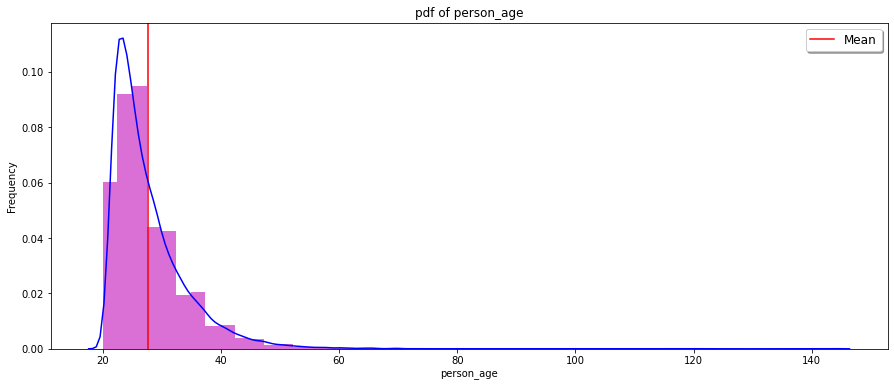

In [80]:
pdf_col('person_age')

skewness:1.662
kurtosis:3.716


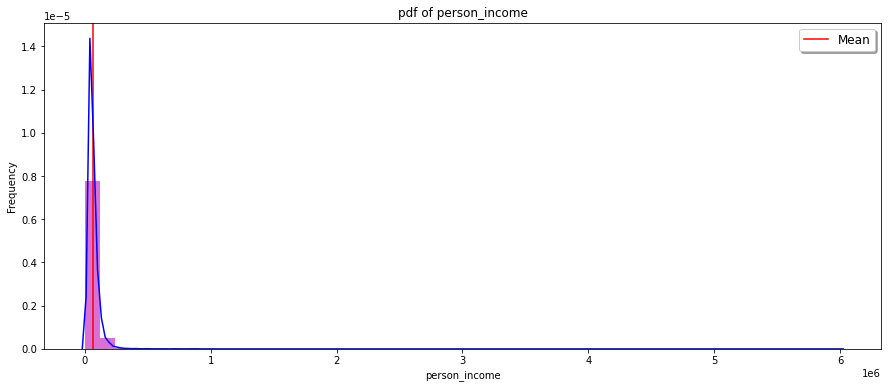

In [73]:
pdf_col('person_income')

skewness:1.662
kurtosis:3.716


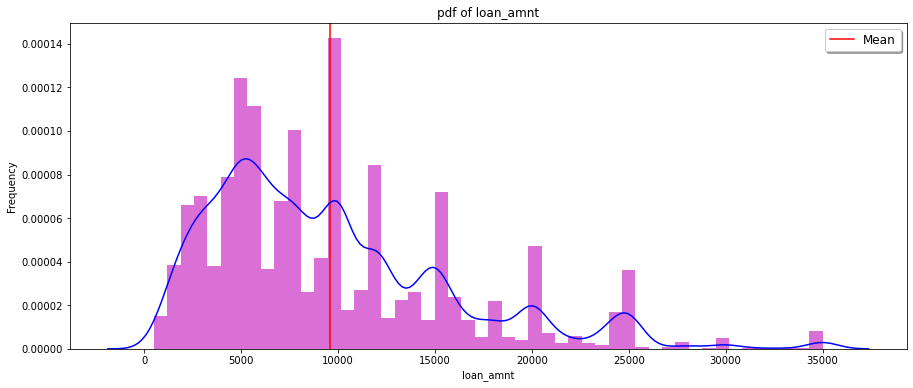

In [74]:
pdf_col('loan_amnt')

skewness:1.662
kurtosis:3.716


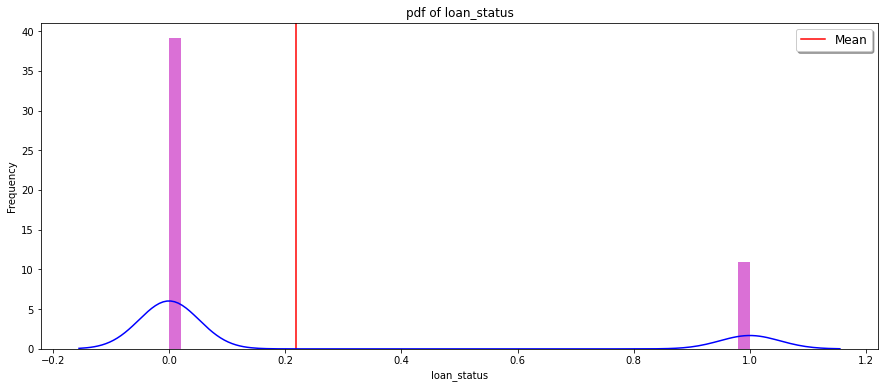

In [131]:
pdf_col('loan_status')

#### Frequency distribution of each categorial variable by using countplot

In [75]:
for i in catg_var:
    print(df[i].value_counts())

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64
N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64


<AxesSubplot:xlabel='loan_intent', ylabel='count'>

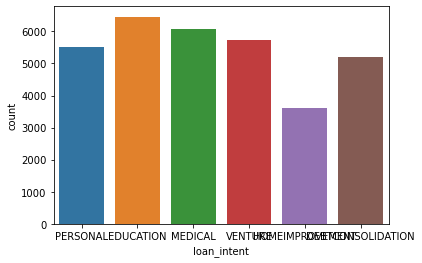

In [82]:
sns.countplot(df['loan_intent'])

- Target is Binary ,discrete or classification we Can't use LinearRegression. we use LogisticRegression, Decision tree, RandomForest, KNN, SVM, Naive Bayes for find the accuracy of a modal.

### LogisticRegression Algorithm

In [83]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed,y_train)

LogisticRegression()

In [84]:
y_test_pred = classifier.predict(X_test_transformed)

In [85]:
temp_df = pd.DataFrame({'Actual': y_test,'Predicted' : y_test_pred})

In [86]:
temp_df.head()

,Actual,Predicted
10775,0,0
28127,0,0
17835,1,1
15419,0,0
20158,0,0


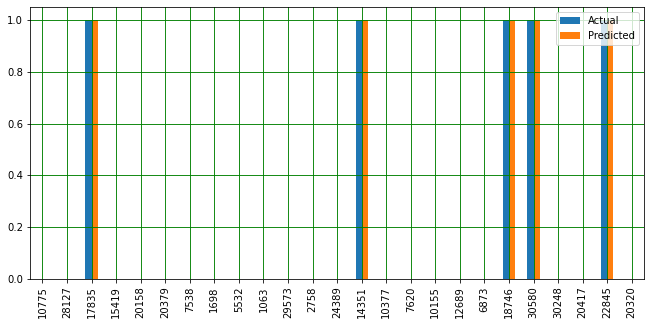

In [96]:
# showing the difference btw the actual value and predicated value
temp_df1 = temp_df.head(25)
temp_df1.plot(kind='bar', figsize=(11,5))
plt.grid(which='major', linestyle='-', linewidth='0.9', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.9', color='black')
plt.show()

In [97]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  0.15774936061381073
Mean Squared Error:  0.15774936061381073
Root Mean Squared Error:  0.39717673725158015


In [98]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test,y_test_pred))

print(classification_report(y_test,y_test_pred))

0.8422506393861893
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      7668
           1       0.74      0.41      0.53      2107

    accuracy                           0.84      9775
   macro avg       0.80      0.69      0.72      9775
weighted avg       0.83      0.84      0.82      9775



### Decision Tree Algorithm


In [99]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [100]:
y_test_pred = regressor.predict(X_test_transformed)

In [101]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
10775,0,0.0
28127,0,0.0
17835,1,1.0
15419,0,0.0
20158,0,0.0


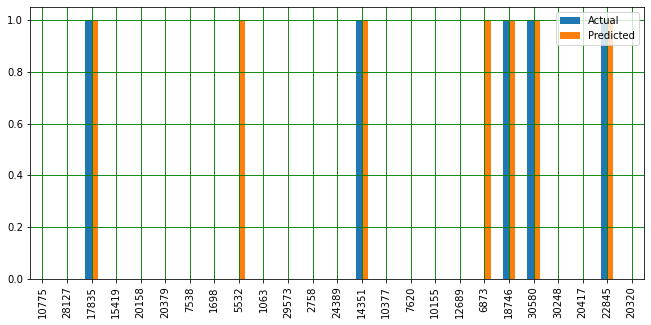

In [102]:
# showing the difference btw the actual value and predicated value
temp_df2 = temp_df.head(25)
temp_df2.plot(kind='bar', figsize=(11,5))
plt.grid(which='major', linestyle='-', linewidth='0.9', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.9', color='black')
plt.show()

In [103]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  0.12030690537084399
Mean Squared Error:  0.12030690537084399
Root Mean Squared Error:  0.34685285838644025


In [104]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test,y_test_pred))

print(classification_report(y_test,y_test_pred))

0.879693094629156
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7668
           1       0.70      0.76      0.73      2107

    accuracy                           0.88      9775
   macro avg       0.82      0.84      0.83      9775
weighted avg       0.88      0.88      0.88      9775



### RandomForest Algorithm

In [105]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed,y_train)

RandomForestClassifier()

In [106]:
y_test_pred = classifier.predict(X_test_transformed)

In [107]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
10775,0,0
28127,0,0
17835,1,1
15419,0,0
20158,0,0


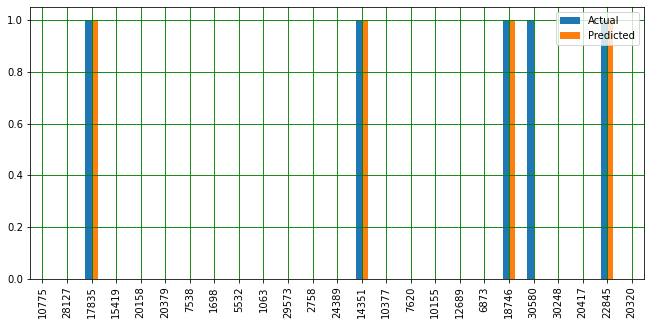

In [108]:
# showing the difference btw the actual value and predicated value
temp_df3 = temp_df.head(25)
temp_df3.plot(kind='bar', figsize=(11,5))
plt.grid(which='major', linestyle='-', linewidth='0.9', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.9', color='black')
plt.show()

In [109]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  0.06966751918158567
Mean Squared Error:  0.06966751918158567
Root Mean Squared Error:  0.263946053544253


In [110]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test,y_test_pred))

print(classification_report(y_test,y_test_pred))

0.9303324808184144
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7668
           1       0.95      0.72      0.82      2107

    accuracy                           0.93      9775
   macro avg       0.94      0.85      0.89      9775
weighted avg       0.93      0.93      0.93      9775



### SVM Algorithm

In [111]:
from sklearn.svm import SVC

In [112]:
classifier = SVC()

In [113]:
classifier.fit(X_train_transformed, y_train)

SVC()

In [114]:
y_pred = classifier.predict(X_test_transformed)

In [115]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.8814322250639386

In [116]:
con_matrix = metrics.confusion_matrix(y_test,y_pred)

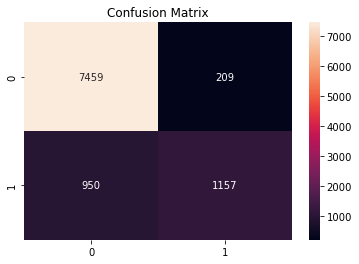

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_matrix, annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.show()

In [118]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      7668
           1       0.85      0.55      0.67      2107

    accuracy                           0.88      9775
   macro avg       0.87      0.76      0.80      9775
weighted avg       0.88      0.88      0.87      9775



### Naive Bayes Algorithm

In [119]:
from sklearn.naive_bayes import GaussianNB

In [120]:
gnbmodel = GaussianNB()
gnbmodel.fit(X_train_transformed, y_train)

GaussianNB()

In [121]:
pred_train = gnbmodel.predict(X_train_transformed)
pred_test = gnbmodel.predict(X_test_transformed)

In [122]:
metrics.confusion_matrix(y_train, pred_train)

array([[15344,  2461],
       [ 2011,  2990]], dtype=int64)

In [123]:
accuracy_score(y_test,pred_test)

0.8043989769820972

In [124]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     17805
           1       0.55      0.60      0.57      5001

    accuracy                           0.80     22806
   macro avg       0.72      0.73      0.72     22806
weighted avg       0.81      0.80      0.81     22806



### KNN Algorithm

In [125]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X_train_transformed)

In [126]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [127]:
y_pred = classifier.predict(X_test_transformed)

In [128]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.8820460358056266

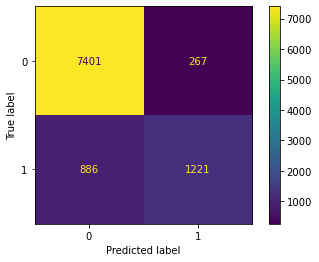

In [129]:
metrics.plot_confusion_matrix(classifier, X_test_transformed, y_test)

In [130]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      7668
           1       0.82      0.58      0.68      2107

    accuracy                           0.88      9775
   macro avg       0.86      0.77      0.80      9775
weighted avg       0.88      0.88      0.87      9775



### Conclusion

1. classification matrix can't handle a mix of binary and continious targets.
2. In this dataset target is  discrete or classification so we can't use linearregression algorithm.
3. Target is classification or discreate we use logistic regression to find the accuracy of a modal.
4. In modeling RandomForest alogrithum give best accuracy then other modals.
5. we use logisticregression , decision tree, KNN , RandomForest, SVM , Naive Bayes, for find the accuracy for a  modal. 